In [30]:
# Data processing 
import numpy as np
import pandas as pd

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Over sampling and under sampling 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter 

# For evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
High = pd.read_csv('/content/drive/MyDrive/data analytics/final project/high.csv')
High_cl = High
High.head(10)

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0
5,01/02/2022,111007,UBSI,1,1597.20,889,6,1.80,1.11,400.0,1.61,500.0
6,01/02/2022,111009,ABCO,1,1859.54,2021,10,0.94,1.20,424.0,1.70,4277.0
7,01/02/2022,111014,INVB,1,2149.98,1463,4,1.47,1.07,600.0,1.57,1452.0
8,01/02/2022,111017,CAPL,1,62400.01,28514,39,2.21,1.87,3099.0,2.36,1500.0
9,01/02/2022,111021,CABK,1,72387.18,48582,31,1.49,1.69,7653.0,2.18,13050.0


In [39]:
from datetime import datetime

for index, row in High_cl.iterrows():
    old_date = row['TRADE_DATE']
    new_date = datetime.strptime(old_date, '%d/%m/%Y').strftime('%Y-%-m-%-d')
    High_cl.at[index, 'TRADE_DATE'] = new_date


In [40]:
High_cl

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,2022-2-1,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,2022-2-1,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,2022-2-1,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,2022-2-1,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,2022-2-1,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28007,2022-10-31,141214,ASAS,2,1025509.50,1981726,25,0.52,1.55,2462.0,2.04,0.0
28008,2022-10-31,141215,UCIC,2,154.70,455,2,0.34,1.02,6959.0,1.52,14710.0
28009,2022-10-31,141223,SHBA,2,57426.99,10276,14,5.61,1.29,70.0,1.79,0.0
28010,2022-10-31,141224,NCCO,1,1135.00,500,1,2.27,1.00,500.0,1.50,500.0


In [49]:
def extract_month(date_str):
    parts = date_str.split('-')
    return int(parts[1])

High_cl['MONTH'] = High_cl['TRADE_DATE'].apply(extract_month)

In [50]:
High_cl.head()

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,MONTH
0,2022-2-1,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0,2
1,2022-2-1,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0,2
2,2022-2-1,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0,2
3,2022-2-1,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0,2
4,2022-2-1,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0,2


In [53]:
df_symbols = High_cl[['SYMBOL1', 'TRADE_QTY', 'VOLUME']]

df_symbols = df_symbols.sort_values('TRADE_QTY', ascending=False).head(6)
df_symbols.head()

,SYMBOL1,TRADE_QTY,VOLUME
23204,CABK,5741963,7327564.15
12065,ULDC,4912152,7795035.95
17854,VFED,4909613,6936994.64
18876,VFED,4908564,6935515.56
19744,VFED,3788024,5352274.46


### ***Data visualization***

Text(0.5, 1.0, 'top companies with the highest trade')

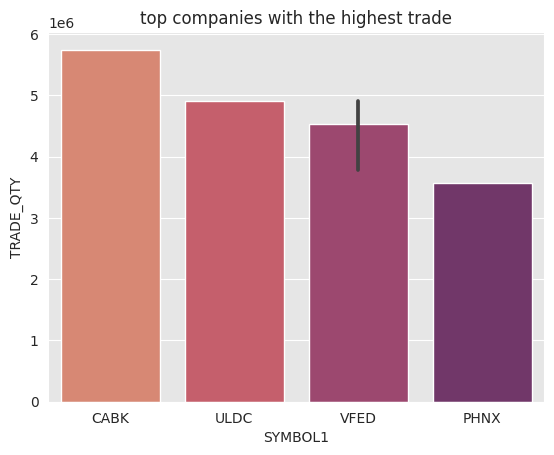

In [66]:
sns.barplot(x='SYMBOL1', y='TRADE_QTY', data=df_symbols, palette='flare')
plt.title('top companies with the highest trade')

Text(0.5, 1.0, 'total number of shares in each market')

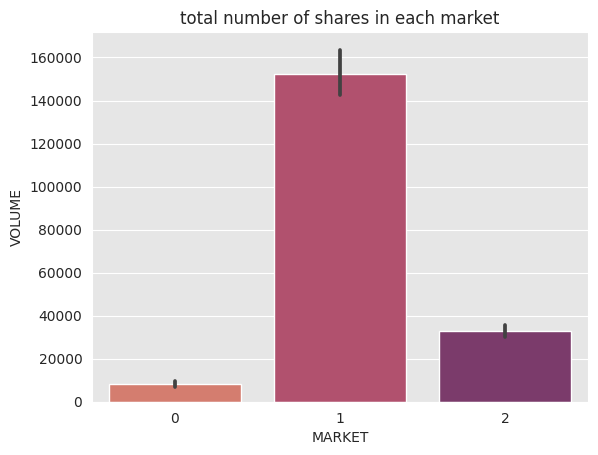

In [65]:
sns.barplot(x='MARKET', y='VOLUME', data=High_cl, palette='flare')
plt.title('total number of shares in each market')

Text(0.5, 1.0, 'total number of shares in each month')

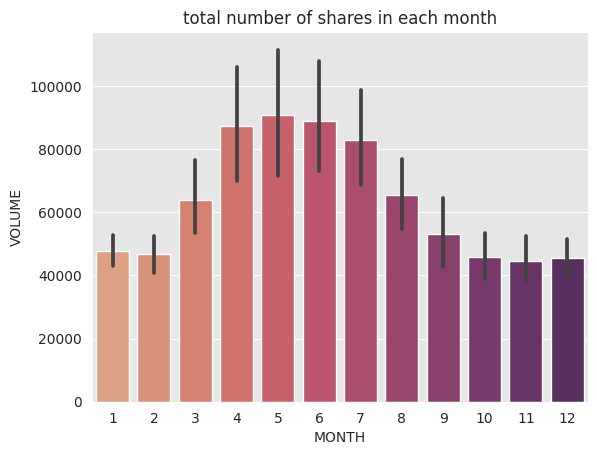

In [64]:
sns.barplot(x='MONTH', y='VOLUME', data=High_cl, palette='flare')
plt.title('total number of shares in each month')


Text(0.5, 1.0, 'number fo trades with the highest bid')

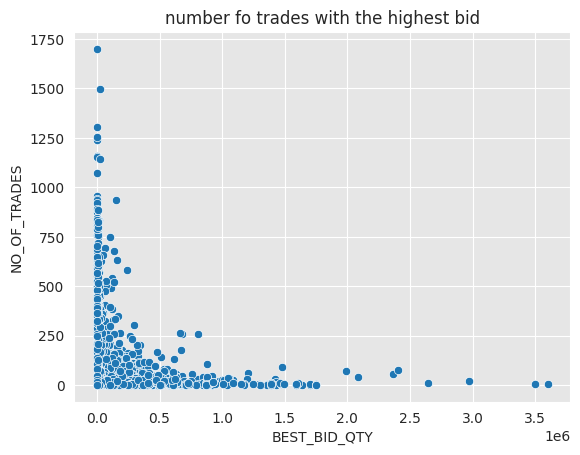

In [71]:
sns.scatterplot(x='BEST_BID_QTY', y='NO_OF_TRADES', data=High_cl)
plt.title('number fo trades with the highest bid')